In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

Load data

In [3]:
org_sig_df = pd.read_csv('Dijet_bb_pt20_50_dw.csv')
org_bkg_df = pd.read_csv('Dijet_qq_pt20_50_dw.csv')

Truth matching & cuts

In [4]:
sig_df = org_sig_df.copy()
bkg_df = org_bkg_df.copy()

In [27]:
sig_df = sig_df[(sig_df['Jet0_MC_Match'] == 1) &
                        (sig_df['Jet0_MC_Jet_EfB'] > 0.6) &
                        (sig_df['Jet0_PT'] > 20000) &
                        (sig_df['Jet0_Eta'] > 2.2) &
                        (sig_df['Jet0_Eta'] < 4.4)]
bkg_df = bkg_df[(bkg_df['Jet0_MC_Match'] == 1) &
                        (bkg_df['Jet0_MC_Jet_EfB'] < 0.6) &
                        (bkg_df['Jet0_MC_Jet_EfD'] < 0.6) &
                        (bkg_df['Jet0_PT'] > 20000) &
                        (bkg_df['Jet0_Eta'] > 2.2) &
                        (bkg_df['Jet0_Eta'] < 4.4)]

In [28]:
sig_df

,Jet0_ENDVERTEX_X,Jet0_ENDVERTEX_Y,Jet0_ENDVERTEX_Z,Jet0_ENDVERTEX_XERR,Jet0_ENDVERTEX_YERR,Jet0_ENDVERTEX_ZERR,Jet0_ENDVERTEX_CHI2,Jet0_ENDVERTEX_NDOF,Jet0_OWNPV_X,Jet0_OWNPV_Y,...,nITClusters,nTTClusters,nOTClusters,nSPDHits,nMuonCoordsS0,nMuonCoordsS1,nMuonCoordsS2,nMuonCoordsS3,nMuonCoordsS4,nMuonTracks
0,0.8738,-0.1754,14.7203,0.0093,0.0093,0.0573,49.857929,107,0.766100,-0.200700,...,671,875,5547,328,349,154,50,6,6,10
2,0.8658,-0.1414,-9.7498,0.0101,0.0101,0.0570,21.601925,57,0.862175,-0.136493,...,370,545,3854,158,179,56,33,7,6,1
3,0.8803,-0.1820,28.3628,0.0094,0.0093,0.0503,40.823803,91,0.881767,-0.183634,...,105,556,2695,118,129,114,33,4,9,3
5,0.8163,-0.0868,8.4282,0.0286,0.0275,0.3193,7.705523,13,0.811200,-0.098801,...,1169,1391,8587,586,668,243,19,14,14,24
7,0.8163,-0.0868,8.4282,0.0286,0.0275,0.3193,7.705523,13,0.811200,-0.098801,...,1169,1391,8587,586,668,243,19,14,14,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,0.8883,-0.1930,-64.3490,0.0073,0.0074,0.0371,52.365398,145,0.888302,-0.192280,...,546,1039,5744,291,340,120,15,24,8,9
199989,0.8620,-0.1497,-19.7838,0.0139,0.0139,0.0846,14.064706,31,0.806806,-0.172888,...,605,1034,5171,284,328,226,7,4,1,3
199990,0.8620,-0.1497,-19.7838,0.0139,0.0139,0.0846,14.064706,31,0.806806,-0.172888,...,605,1034,5171,284,328,226,7,4,1,3
199992,0.8274,-0.1793,-16.5696,0.0304,0.0288,0.2068,4.140278,7,0.935800,-0.187500,...,924,1414,6946,517,632,170,56,22,16,36


In [ ]:
bkg_df

Make plots of data before and after truth matching

In [29]:
def plot_before_after_cuts(col, bins):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Make bins the same
    all_data = np.concatenate([org_sig_df[col], org_bkg_df[col], sig_df[col], bkg_df[col]])
    data_min, data_max = np.min(all_data), np.max(all_data)

    bin_edges = np.linspace(data_min, data_max, bins + 1)

    # Before cuts
    ax1.hist(org_sig_df[col], label="Signal", bins=bin_edges, range=(data_min, data_max), histtype='step', color='darkred')
    ax1.hist(org_bkg_df[col], label="Background", bins=bin_edges, range=(data_min, data_max), histtype='step', color='mediumblue')
    ax1.legend(loc='best')
    ax1.set_yscale('log')
    ax1.set_xlabel(f'{col}')
    ax1.set_ylabel('Counts')
    ax1.set_title('Before Truth Matching');

    # After cuts
    ax2.hist(sig_df[col], label="Signal", bins=bin_edges, range=(data_min, data_max), histtype='step', color='darkred')
    ax2.hist(bkg_df[col], label="Background", bins=bin_edges, range=(data_min, data_max), histtype='step', color='mediumblue')
    ax2.legend(loc='best')
    ax2.set_yscale('log')
    ax2.set_xlabel(f'{col}')
    ax2.set_ylabel('Counts')
    ax2.set_title('After Truth Matching');

    plt.tight_layout()
    plt.show()

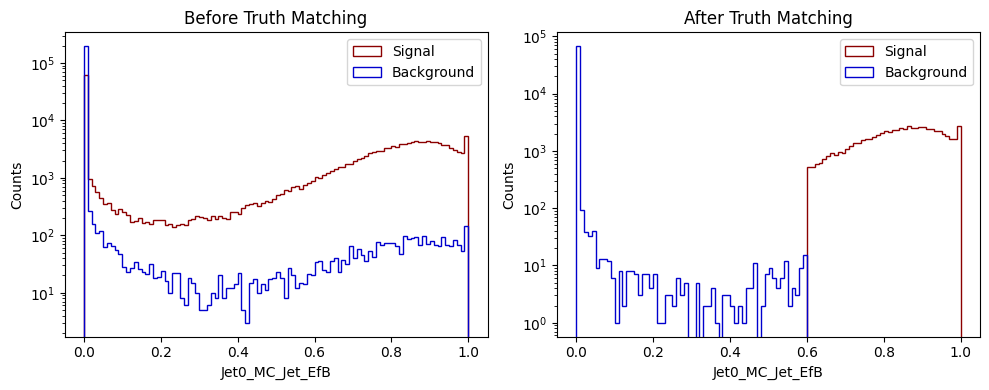

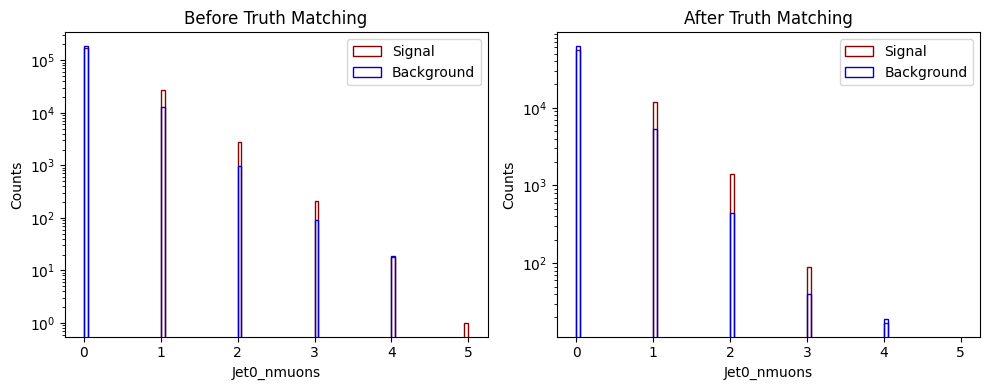

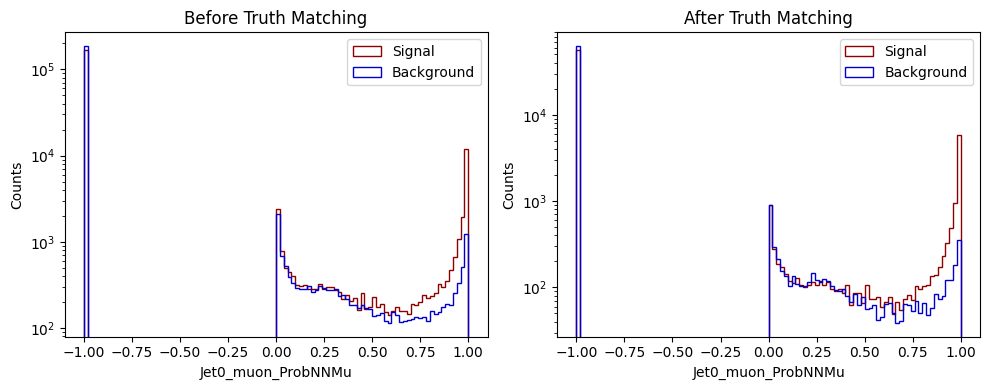

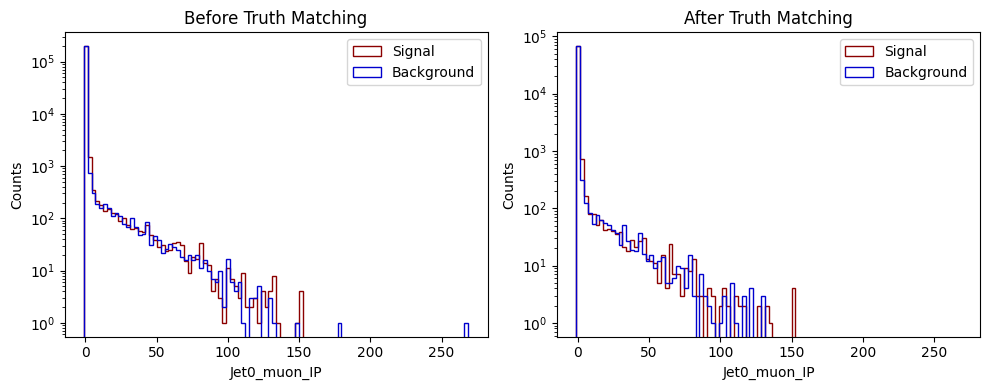

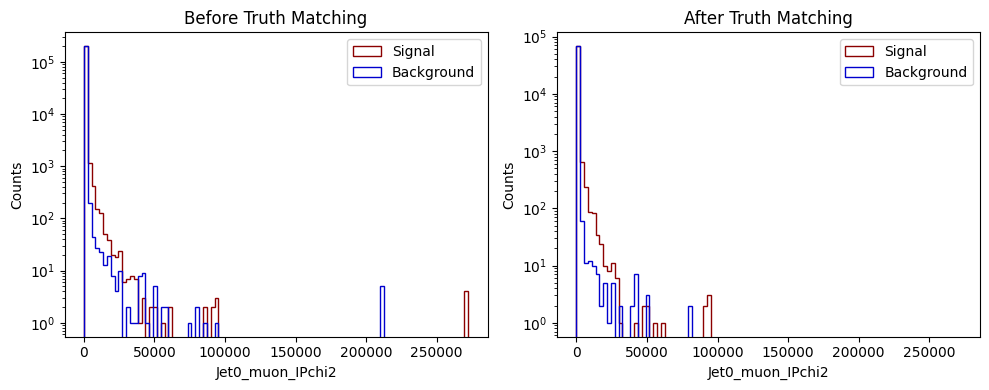

In [31]:
bins = 100
plot_before_after_cuts('Jet0_MC_Jet_EfB', bins)
plot_before_after_cuts('Jet0_nmuons', bins)
plot_before_after_cuts('Jet0_muon_ProbNNMu', bins)
plot_before_after_cuts('Jet0_muon_IP', bins)
plot_before_after_cuts('Jet0_muon_IPchi2', bins)

Plot features data

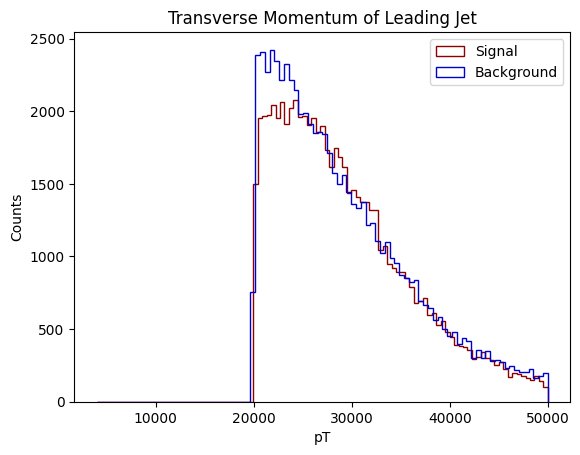

In [32]:
plt.hist(sig_df.Jet0_PT, label="Signal", range=[4000,50000], bins='auto', histtype='step', color='darkred')
plt.hist(bkg_df.Jet0_PT, label="Background", range=[4000,50000], bins='auto', histtype='step', color='mediumblue')
plt.xlabel('pT')
plt.ylabel("Counts")
plt.legend(loc='best')
plt.title('Transverse Momentum of Leading Jet'); 

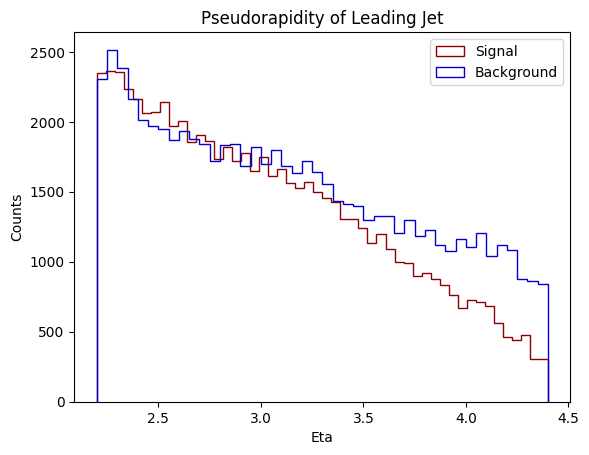

In [33]:
plt.hist(sig_df.Jet0_Eta, label="Signal", range=None, bins='auto', histtype='step', color='darkred')
plt.hist(bkg_df.Jet0_Eta, label="Background", range=None, bins='auto', histtype='step', color='mediumblue')
plt.xlabel('Eta')
plt.ylabel("Counts")
plt.legend(loc='best')
plt.title('Pseudorapidity of Leading Jet'); 

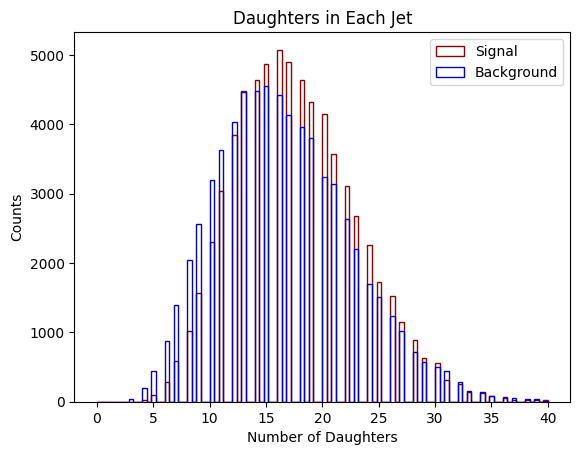

In [34]:
plt.hist(sig_df.Jet0_nDaughters, label="Signal", range=[0,40], bins=100, histtype='step', color='darkred')
plt.hist(bkg_df.Jet0_nDaughters, label="Background", range=[0,40], bins=100, histtype='step', color='mediumblue')
plt.xlabel('Number of Daughters')
plt.ylabel("Counts")
plt.legend(loc='best')
plt.title('Daughters in Each Jet'); 

In [35]:
sig_list = []
bkg_list = []

for i, row in sig_df.iterrows():
    numbers = [float(num.strip()) for num in row['Jet0_Daughters_ID'].strip('[]').split(',')]
    sig_list.extend(numbers)

for i, row in bkg_df.iterrows():
    numbers = [float(num.strip()) for num in row['Jet0_Daughters_ID'].strip('[]').split(',')]
    bkg_list.extend(numbers)

In [36]:
sig_counts = Counter(sig_list)
bkg_counts = Counter(bkg_list)

In [37]:
sig_counts

Counter({22.0: 496754,
         211.0: 235952,
         -211.0: 232082,
         -22.0: 66737,
         310.0: 39285,
         321.0: 28977,
         -321.0: 28599,
         -11.0: 14963,
         11.0: 14550,
         111.0: 11397,
         2212.0: 10255,
         -2212.0: 9640,
         -13.0: 5456,
         13.0: 5055,
         -3122.0: 4861,
         3122.0: 4722})

In [38]:
bkg_counts

Counter({22.0: 459141,
         211.0: 229267,
         -211.0: 223814,
         -22.0: 63545,
         321.0: 28592,
         -321.0: 27363,
         310.0: 17327,
         2212.0: 17210,
         -2212.0: 16193,
         -11.0: 12551,
         11.0: 12104,
         111.0: 11790,
         -3122.0: 2501,
         3122.0: 2409,
         -13.0: 1114,
         13.0: 945})

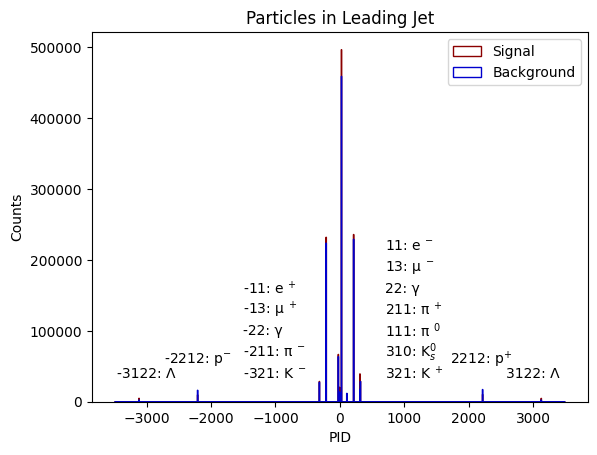

In [76]:
# Plot of Jet 0 Daughters PID (not including some outliers)
plt.hist(sig_list, label='Signal', bins=1000, range=[-3500,3500], histtype='step', color='darkred')
plt.hist(bkg_list, label='Background', bins=1000, range=[-3500,3500], histtype='step', color='mediumblue')

plt.text(-3000, 40000, '-3122: Λ', horizontalalignment='center', verticalalignment='center')
plt.text(-2200, 60000, '-2212: p$^{-}$', horizontalalignment='center', verticalalignment='center')
plt.text(-1500, 40000, '-321: K $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(-1500, 70000, '-211: π $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(-1500, 100000, '-22: γ', horizontalalignment='left', verticalalignment='center')
plt.text(-1500, 130000, '-13: µ $^{+}$', horizontalalignment='left', verticalalignment='center')
plt.text(-1500, 160000, '-11: e $^{+}$', horizontalalignment='left', verticalalignment='center')

plt.text(700, 220000, '11: e $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(700, 190000, '13: µ $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(700, 160000, '22: γ', horizontalalignment='left', verticalalignment='center')
plt.text(700, 130000, '211: π $^{+}$', horizontalalignment='left', verticalalignment='center')
plt.text(700, 100000, '111: π $^{0}$', horizontalalignment='left', verticalalignment='center')
plt.text(700, 70000, '310: K$^{0}_{s}$', horizontalalignment='left', verticalalignment='center')
plt.text(700, 40000, '321: K $^{+}$', horizontalalignment='left', verticalalignment='center')
plt.text(2200, 60000, '2212: p$^{+}$', horizontalalignment='center', verticalalignment='center')
plt.text(3000, 40000, '3122: Λ', horizontalalignment='center', verticalalignment='center')

plt.xlabel('PID');
plt.ylabel('Counts');
plt.title('Particles in Leading Jet');
plt.legend(loc='best');

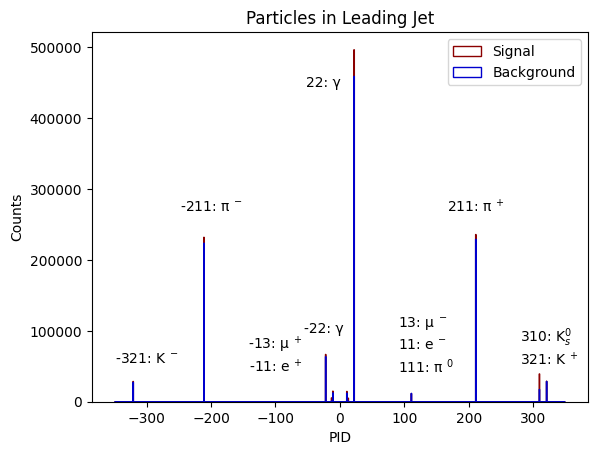

In [80]:
# Plot of Daughters PID in range of pions and kaons
plt.hist(sig_list, label='Signal', bins=1000, range=[-350,350], histtype='step', color='darkred')
plt.hist(bkg_list, label='Background', bins=1000, range=[-350,350], histtype='step', color='mediumblue')

plt.text(-300, 60000, '-321: K $^{-}$', horizontalalignment='center', verticalalignment='center')
plt.text(-200, 275000, '-211: π $^{-}$', horizontalalignment='center', verticalalignment='center')
plt.text(-25, 103000, '-22: γ', horizontalalignment='center', verticalalignment='center')
plt.text(-100, 80000, '-13: µ $^{+}$', horizontalalignment='center', verticalalignment='center')
plt.text(-100, 50000, '-11: e $^{+}$', horizontalalignment='center', verticalalignment='center')

plt.text(90, 80000, '11: e $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(90, 110000, '13: µ $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(-25, 450000, '22: γ', horizontalalignment='center', verticalalignment='center')
plt.text(90, 50000, '111: π $^{0}$', horizontalalignment='left', verticalalignment='center')
plt.text(211, 275000, '211: π $^{+}$', horizontalalignment='center', verticalalignment='center')
plt.text(280, 90000, '310: K$^{0}_{s}$', horizontalalignment='left', verticalalignment='center')
plt.text(280, 60000, '321: K $^{+}$', horizontalalignment='left', verticalalignment='center')

plt.xlabel('PID');
plt.ylabel('Counts');
plt.title('Particles in Leading Jet');
plt.legend(loc='best');

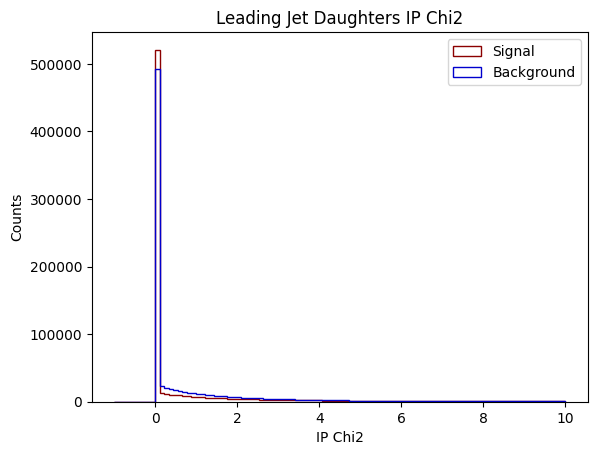

In [71]:
ipchi2_sig_list = []
ipchi2_bkg_list = []

for i, row in sig_df.iterrows():
    numbers = [float(num.strip()) for num in row['Jet0_Daughters_IPCHI2'].strip('[]').split(',')]
    ipchi2_sig_list.extend(numbers)

for i, row in bkg_df.iterrows():
    numbers = [float(num.strip()) for num in row['Jet0_Daughters_IPCHI2'].strip('[]').split(',')]
    ipchi2_bkg_list.extend(numbers)

plt.hist(ipchi2_sig_list, label='Signal', bins=100, range=[-1, 10], histtype='step', color='darkred')
plt.hist(ipchi2_bkg_list, label='Background', bins=100, range=[-1, 10], histtype='step', color='mediumblue')
plt.xlabel('IP Chi2');
plt.ylabel('Counts');
plt.title('Leading Jet Daughters IP Chi2');
plt.legend(loc='best');

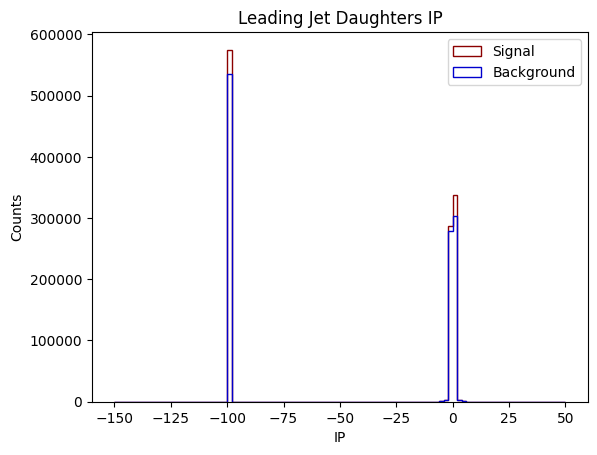

In [72]:
ip_sig_list = []
ip_bkg_list = []

for i, row in sig_df.iterrows():
    numbers = [float(num.strip()) for num in row['Jet0_Daughters_IP'].strip('[]').split(',')]
    ip_sig_list.extend(numbers)

for i, row in bkg_df.iterrows():
    numbers = [float(num.strip()) for num in row['Jet0_Daughters_IP'].strip('[]').split(',')]
    ip_bkg_list.extend(numbers)

plt.hist(ip_sig_list, label='Signal', bins=100, range=[-150,50], histtype='step', color='darkred')
plt.hist(ip_bkg_list, label='Background', bins=100, range=[-150,50], histtype='step', color='mediumblue')
plt.yscale('linear')
plt.xlabel('IP');
plt.ylabel('Counts');
plt.title('Leading Jet Daughters IP');
plt.legend(loc='best');

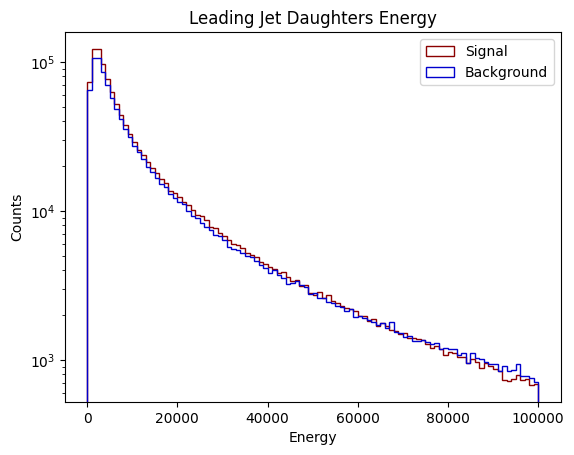

In [73]:
E_sig_list = []
E_bkg_list = []

for i, row in sig_df.iterrows():
    numbers = [float(num.strip()) for num in row['Jet0_Daughters_E'].strip('[]').split(',')]
    E_sig_list.extend(numbers)

for i, row in bkg_df.iterrows():
    numbers = [float(num.strip()) for num in row['Jet0_Daughters_E'].strip('[]').split(',')]
    E_bkg_list.extend(numbers)

plt.hist(E_sig_list, label='Signal', bins=100, range=[0,1e5], histtype='step', color='darkred')
plt.hist(E_bkg_list, label='Background', bins=100, range=[0,1e5], histtype='step', color='mediumblue')
plt.yscale('log')
plt.xlabel('Energy');
plt.ylabel('Counts');
plt.title('Leading Jet Daughters Energy');
plt.legend(loc='best');

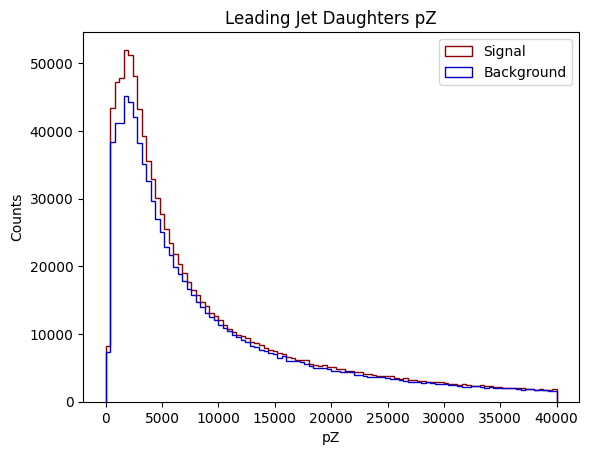

In [47]:
pz_sig_list = []
pz_bkg_list = []

for i, row in sig_df.iterrows():
    numbers = [float(num.strip()) for num in row['Jet0_Daughters_pZ'].strip('[]').split(',')]
    pz_sig_list.extend(numbers)

for i, row in bkg_df.iterrows():
    numbers = [float(num.strip()) for num in row['Jet0_Daughters_pZ'].strip('[]').split(',')]
    pz_bkg_list.extend(numbers)

plt.hist(pz_sig_list, label='Signal', bins=100, range=[0,0.4e5], histtype='step', color='darkred')
plt.hist(pz_bkg_list, label='Background', bins=100, range=[0,0.4e5], histtype='step', color='mediumblue')

plt.xlabel('pZ');
plt.ylabel('Counts');
plt.title('Leading Jet Daughters pZ');
plt.legend(loc='best');

In [48]:
def make_plots(col, bins, range, scale):

    plt.hist(sig_df[col], label="Signal", bins=bins, range=range, histtype='step', color='darkred')
    plt.hist(bkg_df[col], label="Background", bins=bins, range=range, histtype='step', color='mediumblue')
    plt.legend(loc='best')
    plt.yscale(scale)
    plt.xlabel(f'{col}')
    plt.ylabel('Counts')
    plt.title(f'{col}');

    plt.tight_layout()
    plt.show()

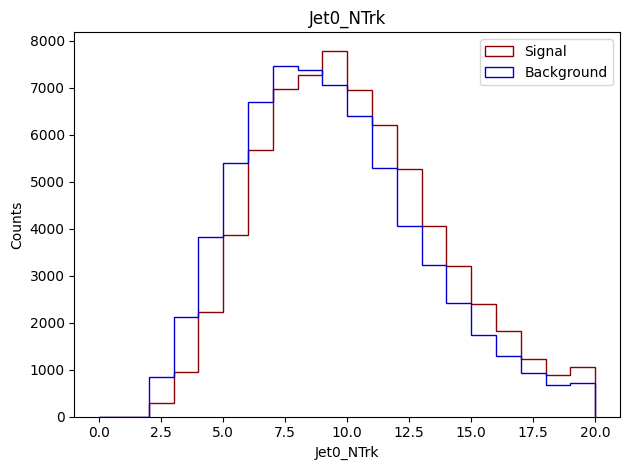

In [49]:
make_plots('Jet0_NTrk', 20, [0,20], 'linear')

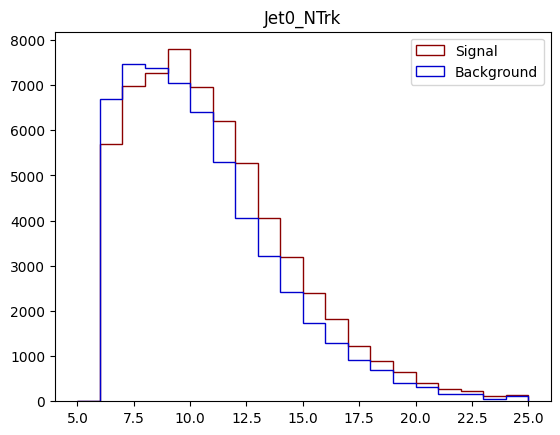

In [50]:
# only plot Jet0_NTrk > 5
dfcut = sig_df[sig_df.Jet0_NTrk > 5]
df2cut = bkg_df[bkg_df.Jet0_NTrk > 5]

plt.hist(dfcut.Jet0_NTrk, label="Signal", bins=20, range=[5,25], histtype='step', color='darkred')
plt.hist(df2cut.Jet0_NTrk, label="Background", bins=20, range=[5,25], histtype='step', color='mediumblue')
plt.legend(loc='best')
plt.title("Jet0_NTrk");

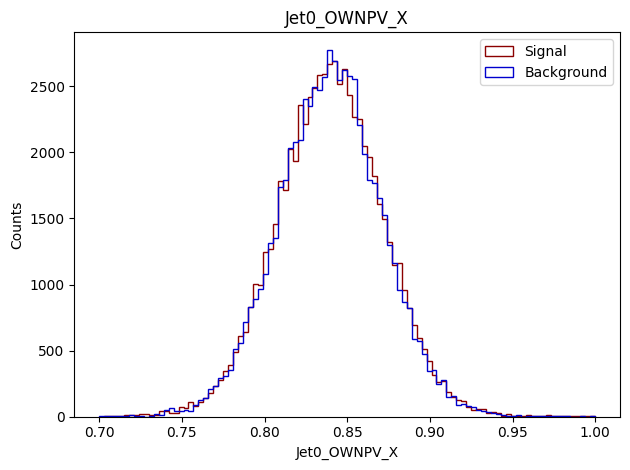

In [51]:
make_plots('Jet0_OWNPV_X', 100, [0.7,1], 'linear')

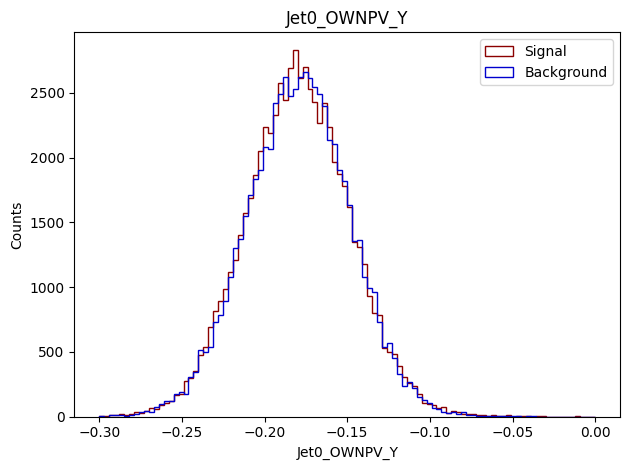

In [52]:
make_plots('Jet0_OWNPV_Y', 100, [-0.3,0], 'linear')

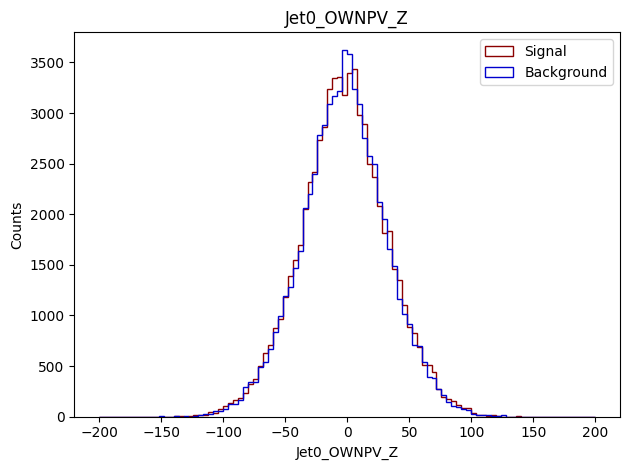

In [53]:
make_plots('Jet0_OWNPV_Z', 100, [-200,200], 'linear')

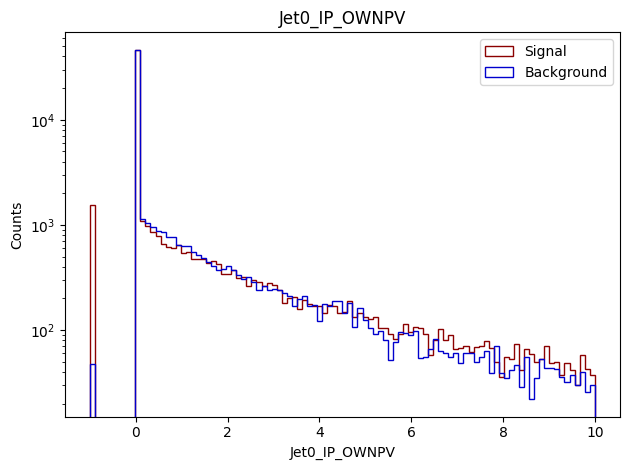

In [54]:
make_plots('Jet0_IP_OWNPV', 100, [-1,10], 'log')

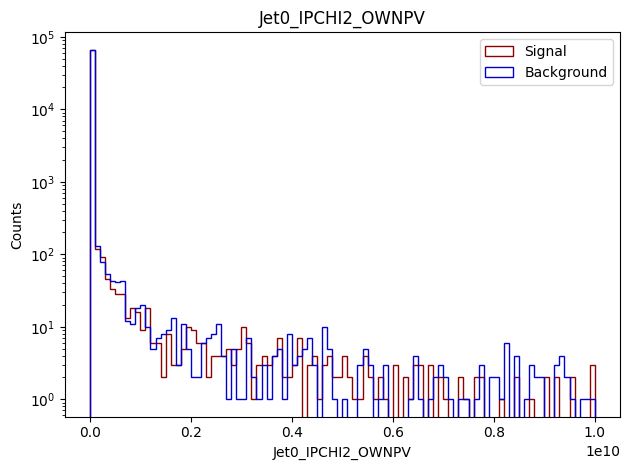

In [55]:
make_plots('Jet0_IPCHI2_OWNPV', 100, [-0.01,1e10], 'log')

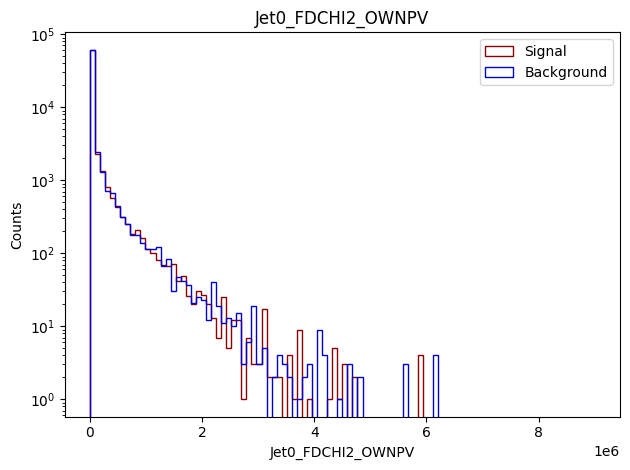

In [56]:
make_plots('Jet0_FDCHI2_OWNPV', 100, [0,9e6], 'log')

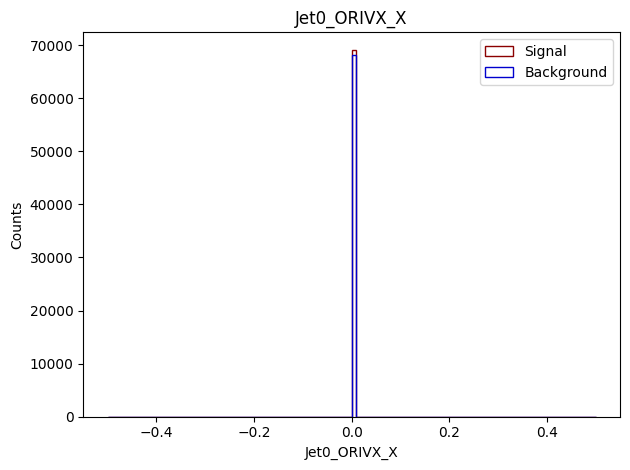

In [57]:
make_plots('Jet0_ORIVX_X', 100, None, 'linear')

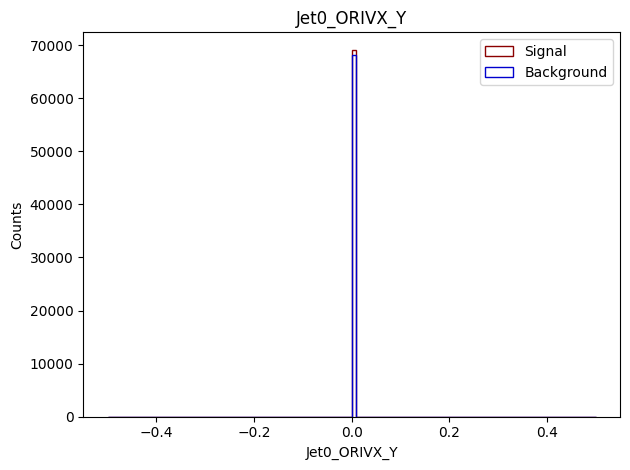

In [58]:
make_plots('Jet0_ORIVX_Y', 100, None, 'linear')

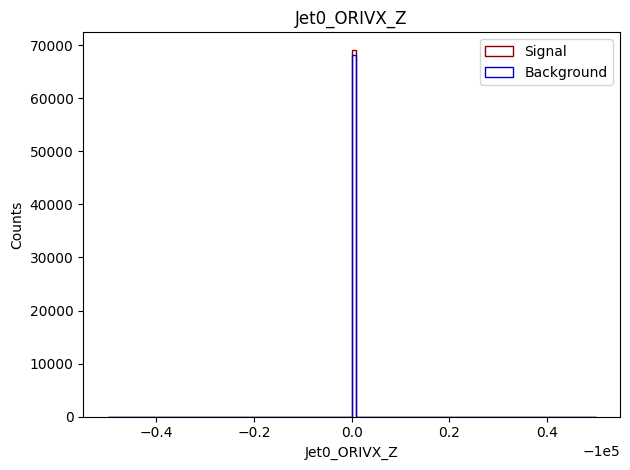

In [59]:
make_plots('Jet0_ORIVX_Z', 100, None, 'linear')

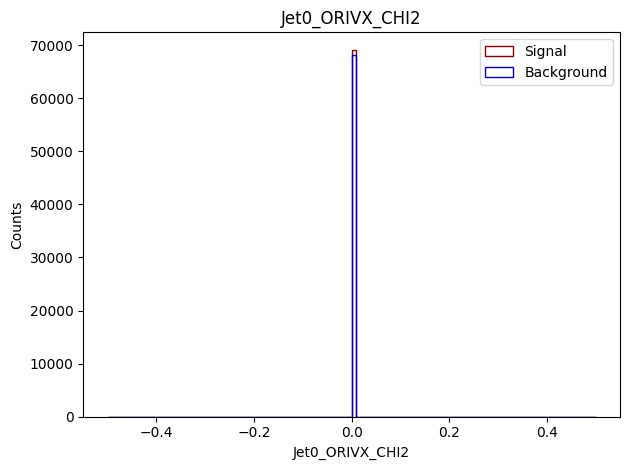

In [60]:
make_plots('Jet0_ORIVX_CHI2', 100, None, 'linear')

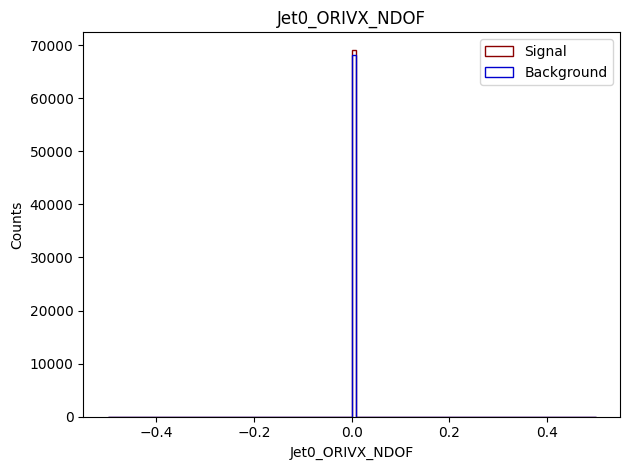

In [62]:
make_plots('Jet0_ORIVX_NDOF', 100, None, 'linear')

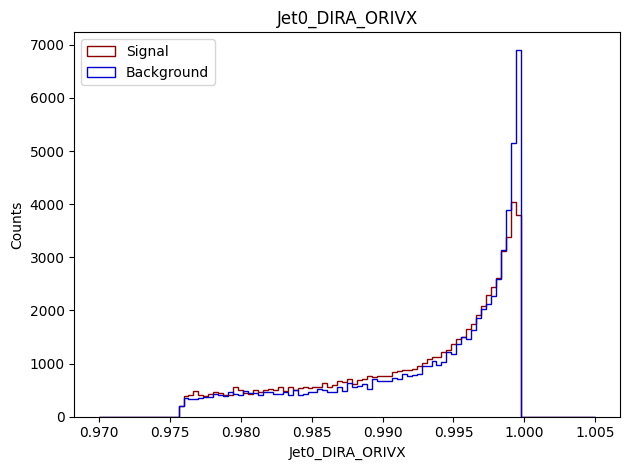

In [63]:
make_plots('Jet0_DIRA_ORIVX', 100, [0.97 ,1.005], 'linear')

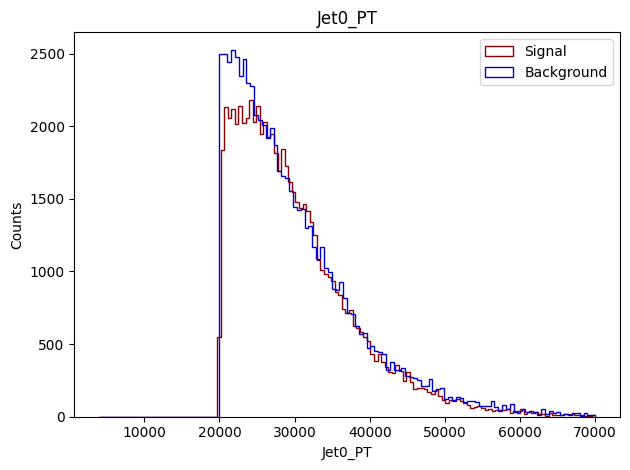

In [64]:
make_plots('Jet0_PT', 'auto', [4000,70000], 'linear')

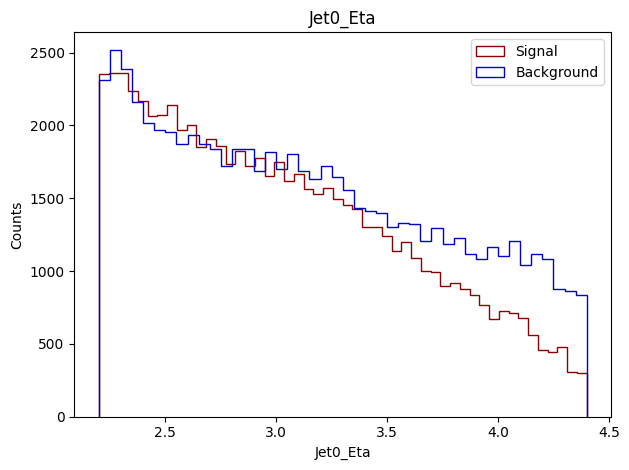

In [65]:
make_plots('Jet0_Eta', 'auto', None, 'linear')

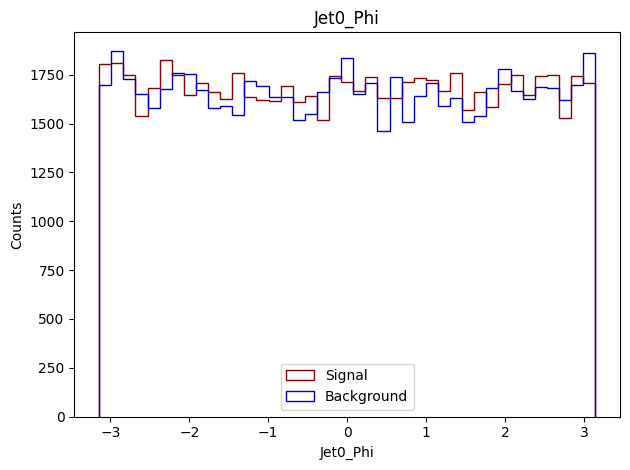

In [66]:
make_plots('Jet0_Phi', 'auto', None, 'linear')